In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/Users/ratnamb.ojha/Downloads/uber.csv.zip')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Data Cleaning and Feature selection

In [5]:
df.shape  #rows, columns

(200000, 9)

In [6]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

#### This shows that we have one NaN value in dropoff_longitude and dropoff_latitude each

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


### There are 3 different data types: integer, floating, and objects

In [8]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


### Insights:
- Some prices are negative or extremely high, and some locations are outside where rides could possibly happen. These need to be removed from your data because they don’t make sense in real life.
- The number of passengers for some rides is unrealistic (like 208). Most cars only fit a few people, so you should keep only rides with a reasonable number of passengers (for example, 1 to 6).
- One column (“Unnamed: 0”) is just a row number. You can remove this since it isn’t useful for analysis.
- You can calculate how far each ride is using the pickup and dropoff locations. This will help understand how distance affects the price.
- Creating new categories: Group rides by the number of passengers (such as solo, couple, or group trips). This helps see if bigger groups pay more.
- Spot rides where the price or the trip details don’t match others. Removing these will make your analysis more accurate.

In [9]:
print(df.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [10]:
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])

In [11]:
df['year'] = df['pickup_datetime'].dt.year # extracting year
df['month'] = df['pickup_datetime'].dt.month # extracting the month
df['day'] = df['pickup_datetime'].dt.day # extracting the day
df['hour'] = df['pickup_datetime'].dt.hour # extracting the hour
df['minute'] = df['pickup_datetime'].dt.minute  # extracting the minute

In [12]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47


In [13]:
df.drop(columns={"pickup_datetime"},inplace=True)
df.drop(columns={'key'},inplace=True)
df.drop(columns={"Unnamed: 0"},inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47


## Calculating distance between longitudes and latitudes:
- The haversine formula calculates the shortest distance between two points on the surface of a sphere, given their latitude and longitude.
- This “great-circle distance” is especially useful for navigation on Earth and in geospatial calculations, as it takes into account the curvature of the planet.

In [14]:
import math
def haversine(latitude1,longitude1,latitude2,longitude2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface specified in decimal degrees.

    Parameters:
    latitude1, longitude1 : Latitude and longitude of point 1 (in decimal degrees)
    latitude2, longitude2 : Latitude and longitude of point 2 (in decimal degrees)

    Returns:
    Distance in kilometers between the two points.
    """
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert degrees to radians
    latitude1 = math.radians(latitude1)
    longitude1 = math.radians(longitude1)
    latitude2 = math.radians(latitude2)
    longitude2 = math.radians(longitude2)

    # Haversine formula
    dlon = longitude2 - longitude1
    dlat = latitude2 - latitude1

    a = math.sin(dlat / 2)**2 + math.cos(latitude1) * math.cos(latitude2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))

    distance = R * c  # Distance in kilometers
    return distance

In [15]:
df['distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47,4.475450


In [16]:
df = df[(df['fare_amount'] > 0) & (df['distance'] > 0)]
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47,4.475450


In [17]:
df.shape

(194347, 12)

In [18]:
df.drop(columns={"pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"},inplace=True)
df.head()

,fare_amount,passenger_count,year,month,day,hour,minute,distance
0,7.5,1,2015,5,7,19,52,1.683323
1,7.7,1,2009,7,17,20,4,2.457590
2,12.9,1,2009,8,24,21,45,5.036377
3,5.3,3,2009,6,26,8,22,1.661683
4,16.0,5,2014,8,28,17,47,4.475450


In [19]:
# Rush hour if pickup is between 7-10 AM or 4-7 PM
df['is rush hour'] = df['hour'].isin(list(range(7,11)) + list(range(16,20))).astype(int)
df.head()

,fare_amount,passenger_count,year,month,day,hour,minute,distance,is rush hour
0,7.5,1,2015,5,7,19,52,1.683323,1
1,7.7,1,2009,7,17,20,4,2.457590,0
2,12.9,1,2009,8,24,21,45,5.036377,0
3,5.3,3,2009,6,26,8,22,1.661683,1
4,16.0,5,2014,8,28,17,47,4.475450,1


In [20]:
# 1 if more than 1 passenger, else 0
df['is a group trip'] = (df['passenger_count'] > 1).astype(int)
df.head()

,fare_amount,passenger_count,year,month,day,hour,minute,distance,is rush hour,is a group trip
0,7.5,1,2015,5,7,19,52,1.683323,1,0
1,7.7,1,2009,7,17,20,4,2.457590,0,0
2,12.9,1,2009,8,24,21,45,5.036377,0,0
3,5.3,3,2009,6,26,8,22,1.661683,1,1
4,16.0,5,2014,8,28,17,47,4.475450,1,1


## Checking for outliers:

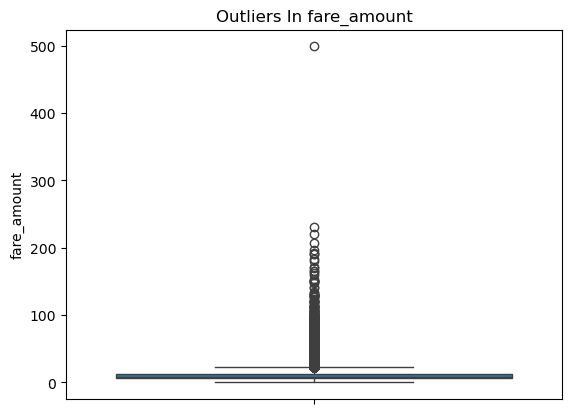

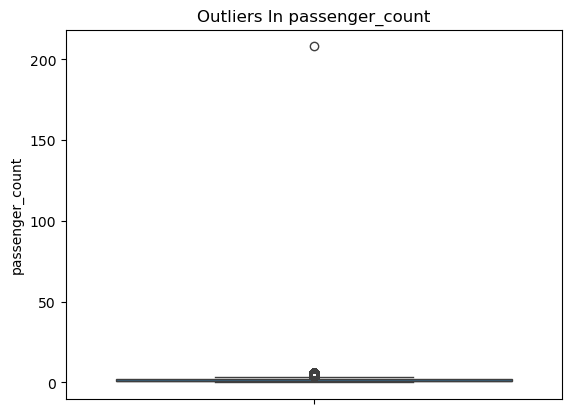

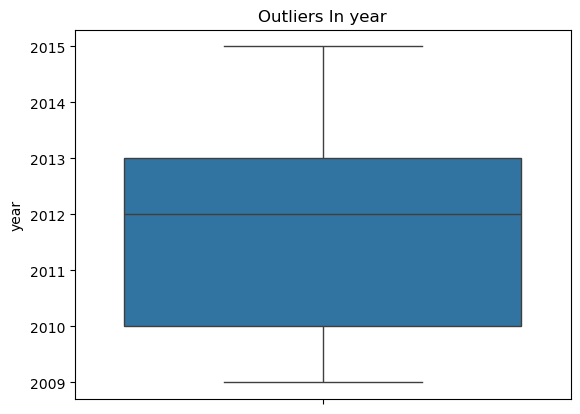

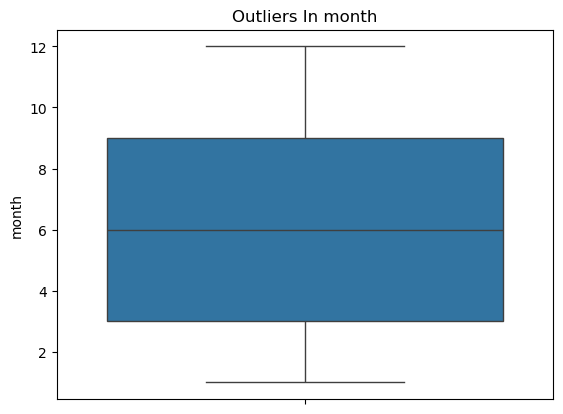

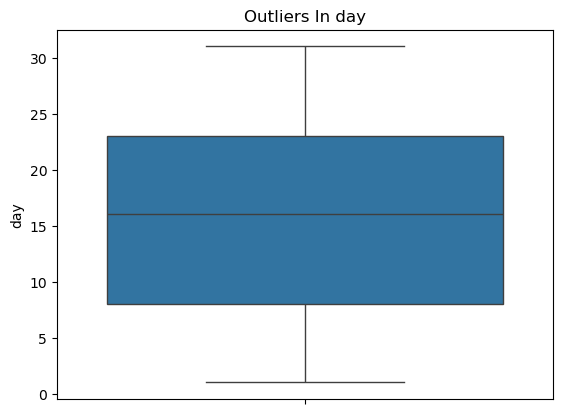

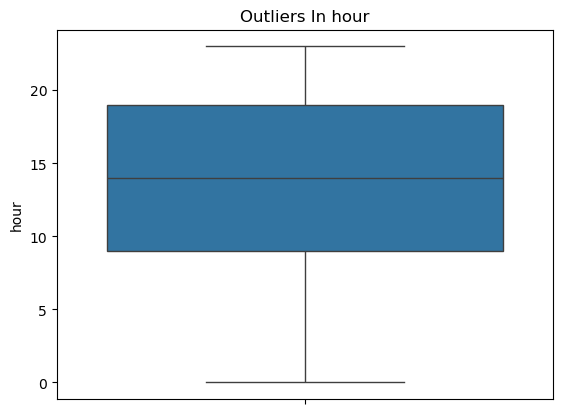

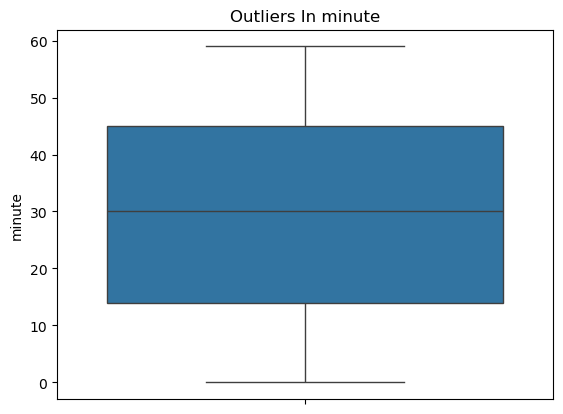

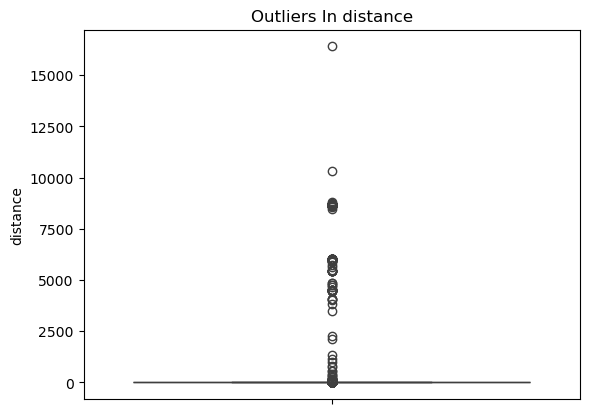

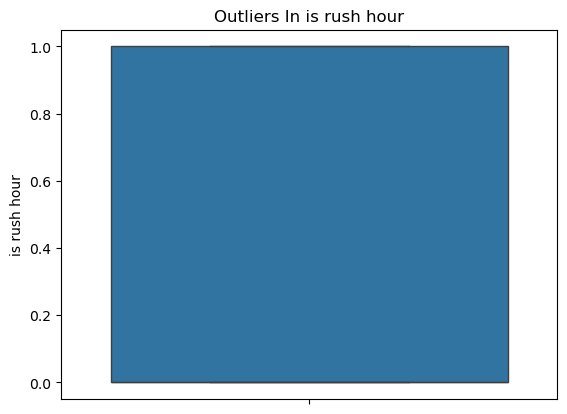

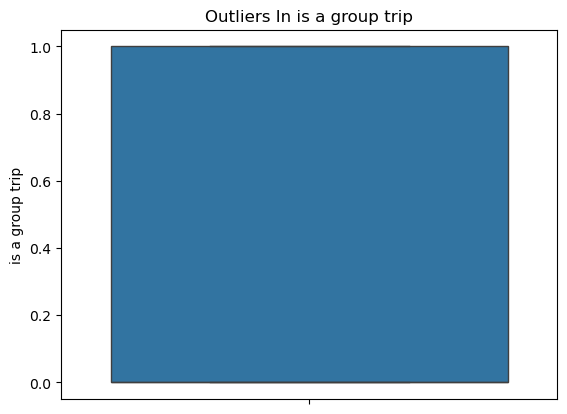

In [21]:
for column in df.columns:
  sns.boxplot(df[column])
  plt.title(f"Outliers In {column}")
  plt.show()

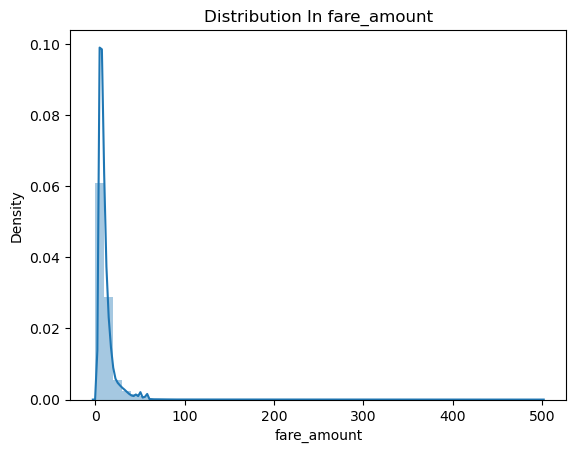

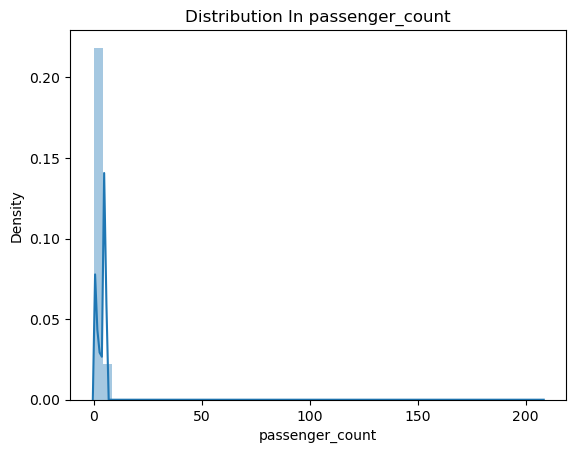

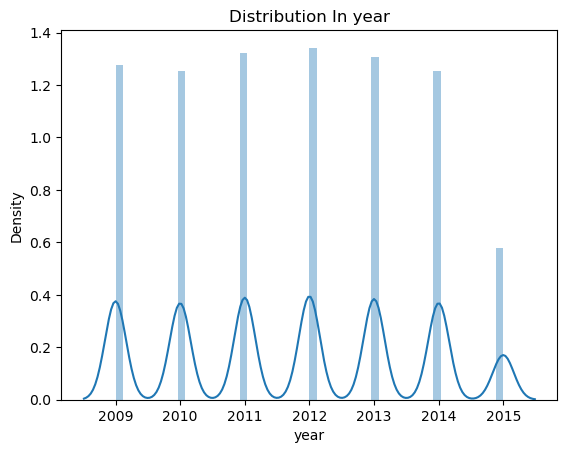

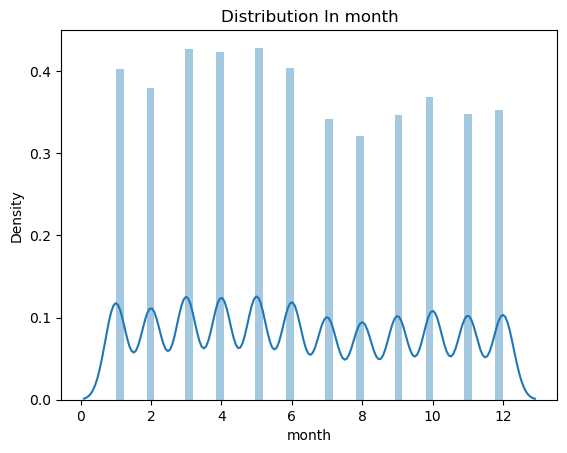

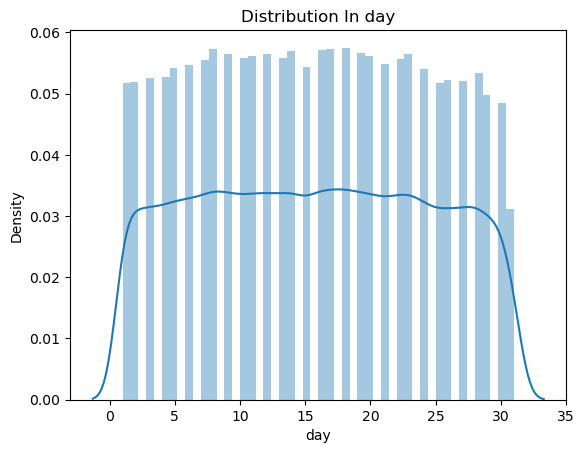

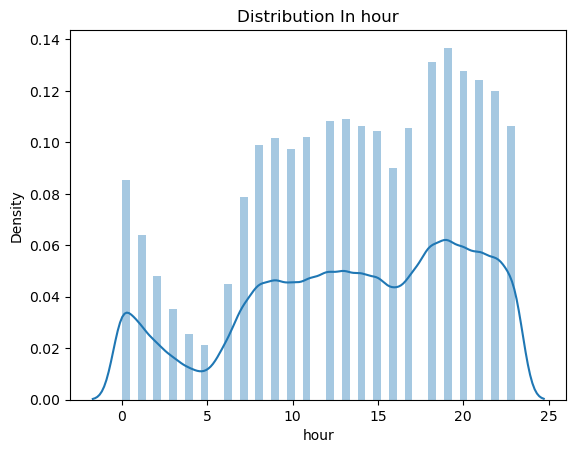

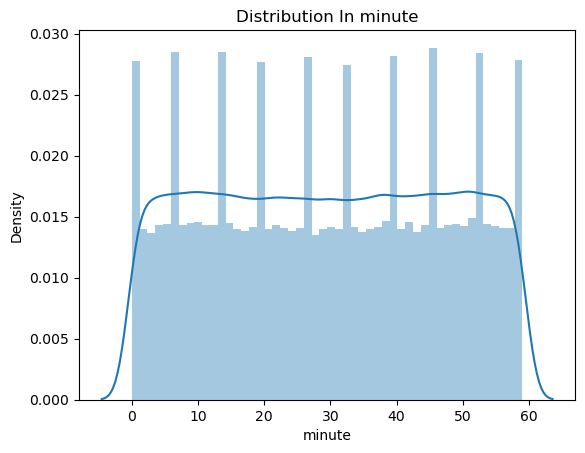

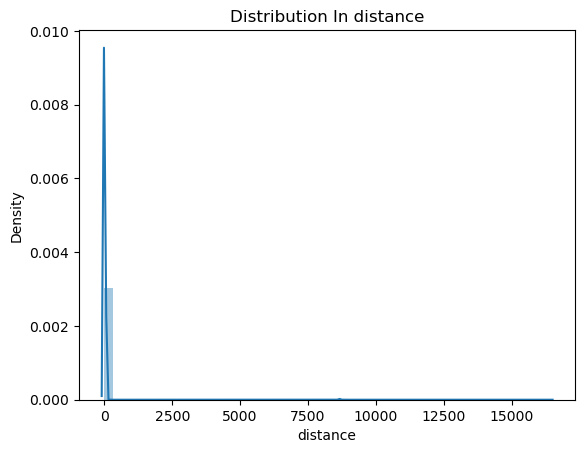

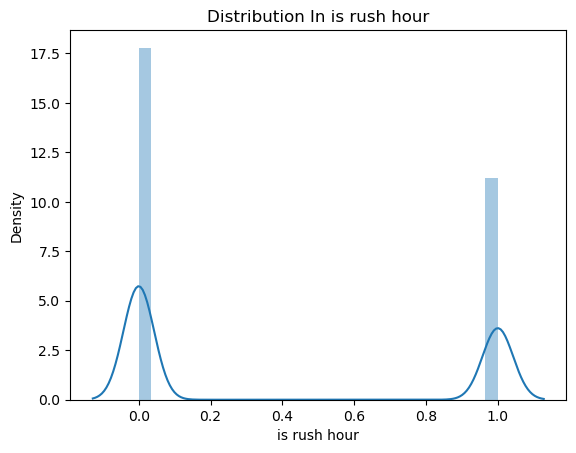

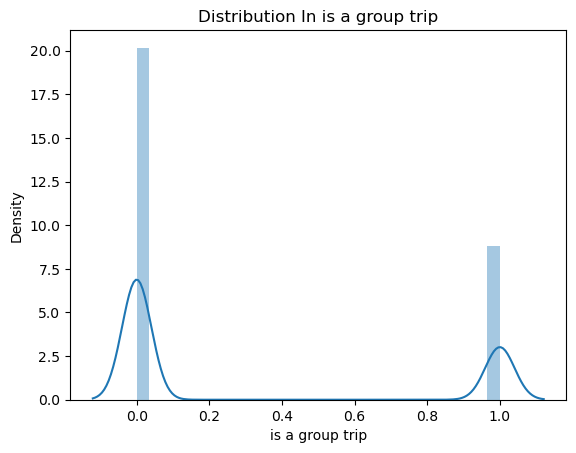

In [22]:
for column in df.columns:
  sns.distplot(df[column])
  plt.title(f"Distribution In {column}")
  plt.show()

### We can observe that in the distribution graphs of fare_amount, passenger_count, distance are highly skewed to the right(there is along tail at the right side of the graph)
#### To combat this problem, we can use data transformation techniques such as Log Transformation, Sqaure root/cube transformation etc.
#### Since Log transformation is commonly used for Right Skewed data, we'll use that over here.

In [23]:
# creating some interaction features like fare_per_km , fare_per_passengers
# Assuming df_copy is your DataFrame
df['fare_per_km'] = df['fare_amount'] / (df['distance'] + 1e-3)  # avoid division by 0
df['fare_per_passenger'] = df['fare_amount'] / (df['passenger_count'] + 1e-3)

# Applying log transformation to the features fare_amount and distance
df['fare_amount'] = np.log(df['fare_amount'] + 1)
df['passenger_count_log'] = np.log(df['passenger_count'] + 1) 
df['distance'] = np.log(df['distance'] + 1) 

<Axes: >

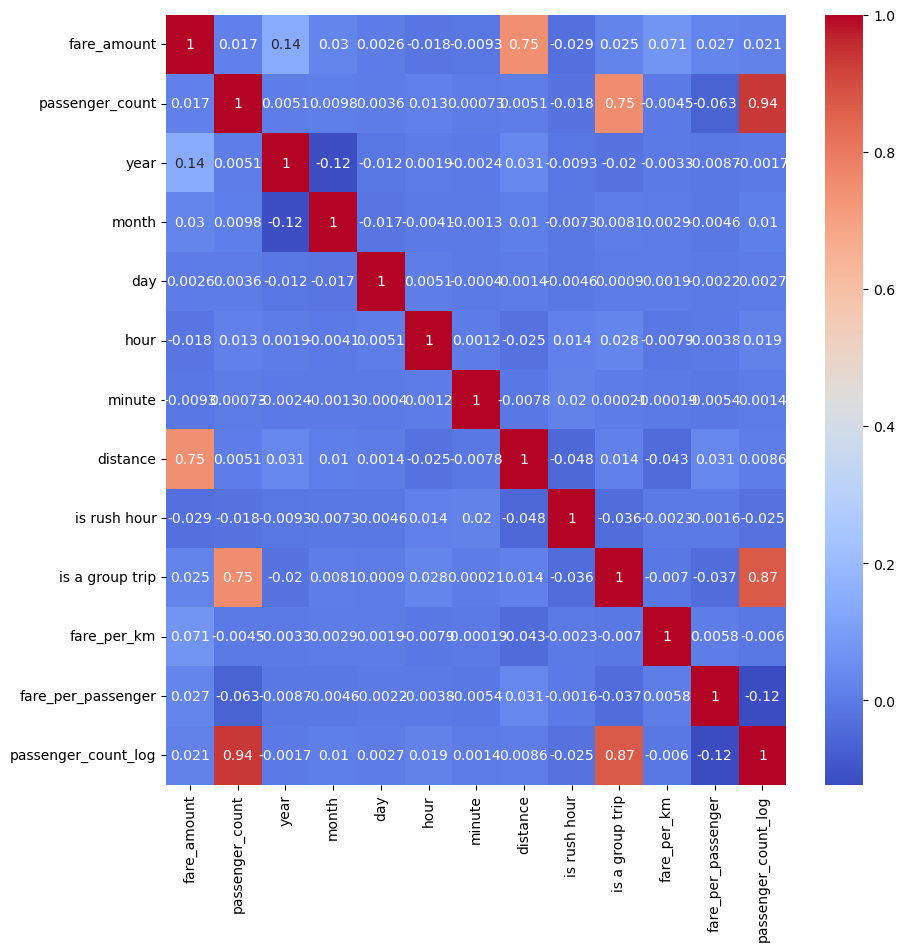

In [24]:
# checking the correlation with each variable
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [25]:
# dropping the unnecessary columns
df.drop(columns = {"minute","hour","day","year","month"},inplace=True)
df.head()

,fare_amount,passenger_count,distance,is rush hour,is a group trip,fare_per_km,fare_per_passenger,passenger_count_log
0,2.140066,1,0.987056,1,0,4.452828,7.492507,0.693147
1,2.163323,1,1.240572,0,0,3.131877,7.692308,0.693147
2,2.631889,1,1.797804,0,0,2.560856,12.887113,0.693147
3,1.840550,3,0.978959,1,1,3.187618,1.766078,1.386294
4,2.833213,5,1.700274,1,1,3.574261,3.199360,1.791759


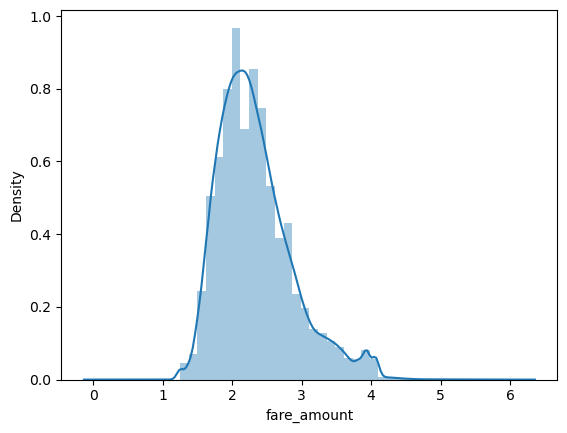

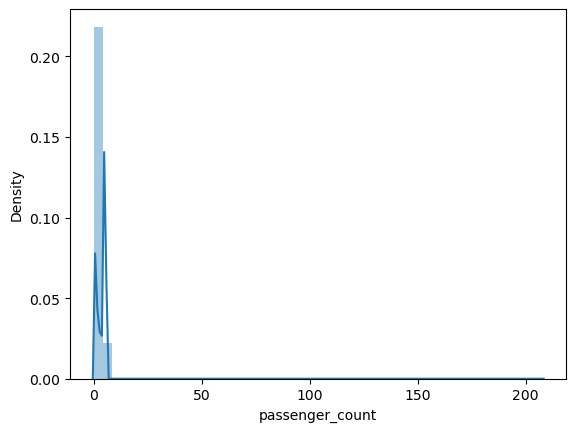

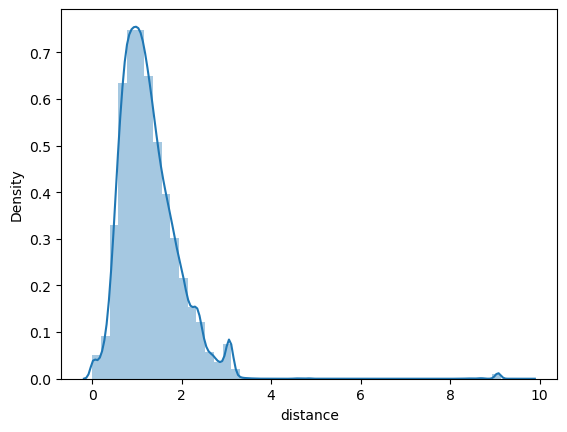

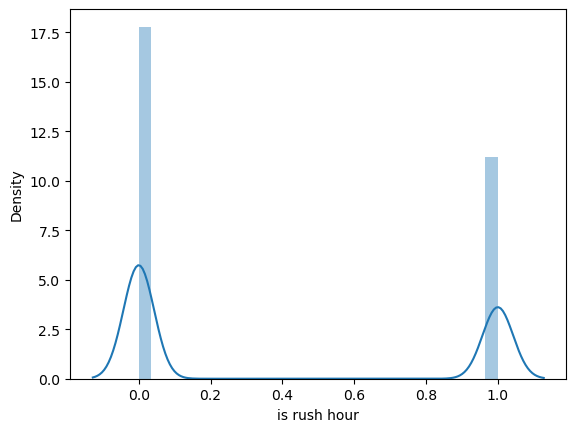

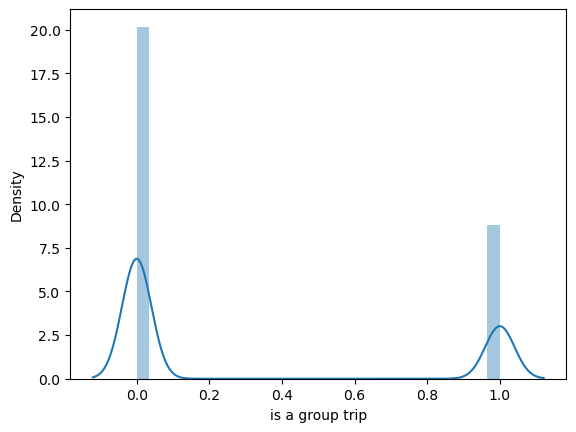

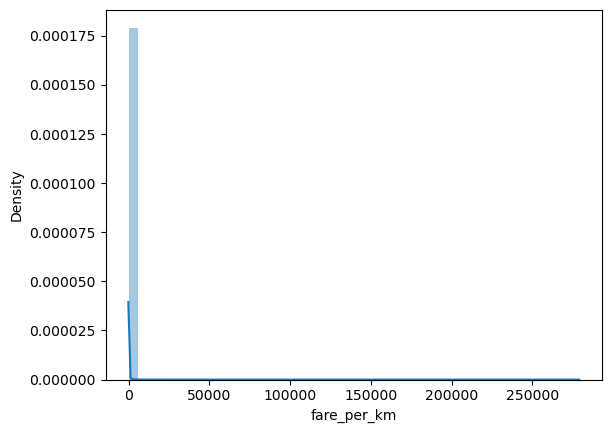

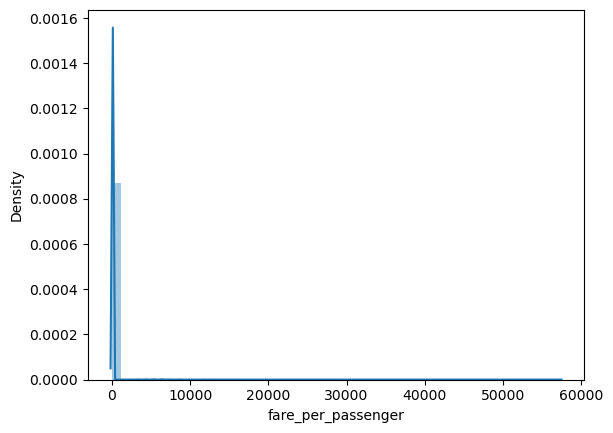

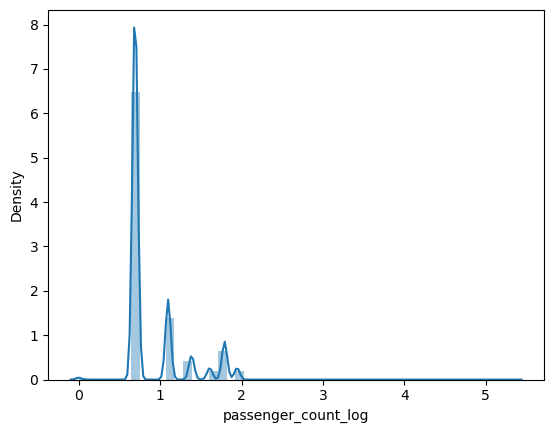

In [26]:
for columns in df.columns:
  sns.distplot(df[columns])
  plt.show()

In [27]:
df.skew()

fare_amount              0.983906
passenger_count         18.529502
distance                 3.425713
is rush hour             0.465552
is a group trip          0.849531
fare_per_km            116.685674
fare_per_passenger      31.683159
passenger_count_log      1.507309
dtype: float64

In [28]:
df.isna().sum()

fare_amount            0
passenger_count        0
distance               0
is rush hour           0
is a group trip        0
fare_per_km            0
fare_per_passenger     0
passenger_count_log    0
dtype: int64

In [29]:
# removing zero and inf values from the dataset
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < np.inf)]
df = df[(df['distance'] > 0) & (df['distance'] < np.inf)]

In [30]:
df.shape

(194347, 8)

In [31]:
df['fare_per_km'] = np.log(df['fare_per_km'] + 1)
df['fare_per_passenger'] = np.log(df['fare_per_passenger'] + 1)
df.skew()

fare_amount             0.983906
passenger_count        18.529502
distance                3.425713
is rush hour            0.465552
is a group trip         0.849531
fare_per_km             6.472581
fare_per_passenger      2.499156
passenger_count_log     1.507309
dtype: float64

# Model Training

In [32]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
import warnings

In [33]:
X = df.drop('fare_amount', axis=1)
X.head()

,passenger_count,distance,is rush hour,is a group trip,fare_per_km,fare_per_passenger,passenger_count_log
0,1,0.987056,1,0,1.696134,2.139184,0.693147
1,1,1.240572,0,0,1.418732,2.162438,0.693147
2,1,1.797804,0,0,1.270001,2.630961,0.693147
3,3,0.978959,1,1,1.432132,1.017430,1.386294
4,5,1.700274,1,1,1.520445,1.434932,1.791759


In [34]:
Y = df['fare_amount']
print(Y.head())

0    2.140066
1    2.163323
2    2.631889
3    1.840550
4    2.833213
Name: fare_amount, dtype: float64


In [35]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    (
        ('OneHotEncoder', categorical_transformer, categorical_features),
        ('StandardScaler', numeric_transformer, numerical_features)
    )
)

In [36]:
X = preprocessor.fit_transform(X)
X.shape

(194347, 7)

In [37]:
#separating data into training and test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((155477, 7), (38870, 7))

## Create and evaluate function to give all metrics for Model Training

In [38]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_score_value = r2_score(true,predicted)
    return mse, mae, rmse, r2_score_value

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor


models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Catboost Regressor": CatBoostRegressor(verbose=False),
    "Adaboost Regressor": AdaBoostRegressor(),
    "xgboost Regressor": XGBRegressor()
}
# Ensure all models are defined and imported correctly from previous cells.
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)  # Train Model

    #Make Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    #Evaluate Model
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for Training set")
    print("-Root Mean Sqaured Error: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-Mean Squared Error: {:.4f}".format(model_train_mse))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print('-'*30)

    print("Model performance for Testing set")
    print("-Root Mean Sqaured Error: {:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-Mean Squared Error: {:.4f}".format(model_test_mse))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*30)
    print('\n')

Linear Regression
Model performance for Training set
-Root Mean Sqaured Error: 0.1677
-Mean Absolute Error: 0.0281
-Mean Squared Error: 0.0871
-R2 Score: 0.9054
------------------------------
Model performance for Testing set
-Root Mean Sqaured Error: 1.6193
-Mean Absolute Error: 2.6222
-Mean Squared Error: 0.0965
-R2 Score: -7.7774


K-Neighbors Regressor
Model performance for Training set
-Root Mean Sqaured Error: 0.0205
-Mean Absolute Error: 0.0004
-Mean Squared Error: 0.0036
-R2 Score: 0.9986
------------------------------
Model performance for Testing set
-Root Mean Sqaured Error: 0.0240
-Mean Absolute Error: 0.0006
-Mean Squared Error: 0.0046
-R2 Score: 0.9981


Decision Tree Regressor
Model performance for Training set
-Root Mean Sqaured Error: 0.0000
-Mean Absolute Error: 0.0000
-Mean Squared Error: 0.0000
-R2 Score: 1.0000
------------------------------
Model performance for Testing set
-Root Mean Sqaured Error: 0.0162
-Mean Absolute Error: 0.0003
-Mean Squared Error: 0.0016
-

In [40]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,Random Forest Regressor,0.999530
4,Catboost Regressor,0.999510
2,Decision Tree Regressor,0.999118
6,xgboost Regressor,0.998613
1,K-Neighbors Regressor,0.998068
5,Adaboost Regressor,0.882945
0,Linear Regression,-7.777386


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

random_model = RandomForestRegressor()

# Fit the model
random_model = random_model.fit(X_train, Y_train)

# Predict on test set
y_pred = random_model.predict(X_test)

# Calculate R² score as a percentage
score = r2_score(Y_test, y_pred) * 100

# Display the accuracy
print(" Accuracy of the model is %.2f" % score)


 Accuracy of the model is 99.96


## Plot Y_test and y_pred

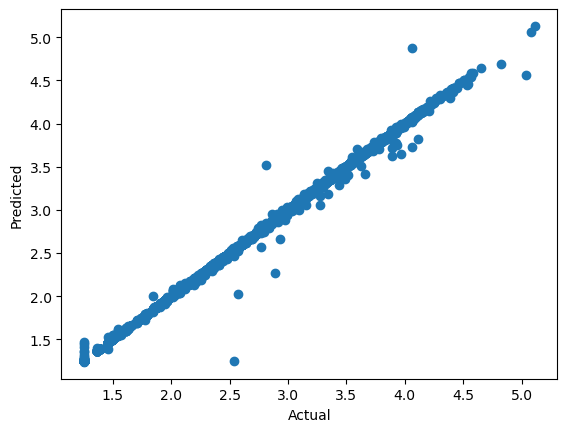

In [42]:
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

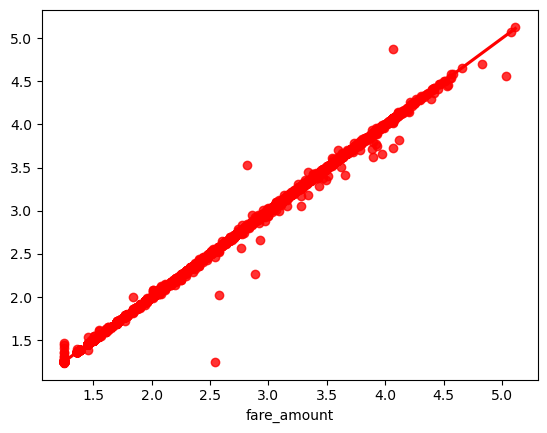

In [43]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');

In [44]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
198861,2.970414,2.970414,2.664535e-15
129617,1.840550,1.840550,-9.992007e-15
83855,1.774952,1.774952,0.000000e+00
193605,2.014903,2.014903,1.598721e-14
94557,3.030134,3.030947,-8.130664e-04
...,...,...,...
175016,1.458615,1.458615,-1.776357e-15
130258,2.674149,2.674145,3.805356e-06
152314,2.564949,2.564949,1.776357e-15
51383,2.660260,2.660676,-4.166734e-04
